Matriz inicial:


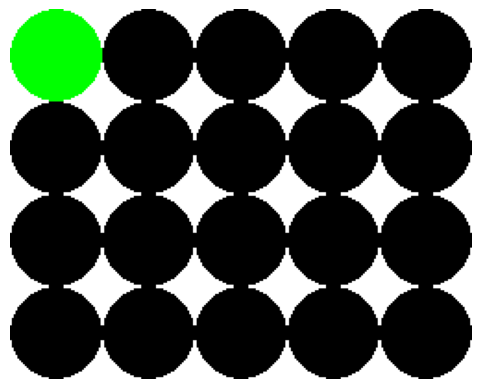

Após trocar(2, 1, 'verde'):


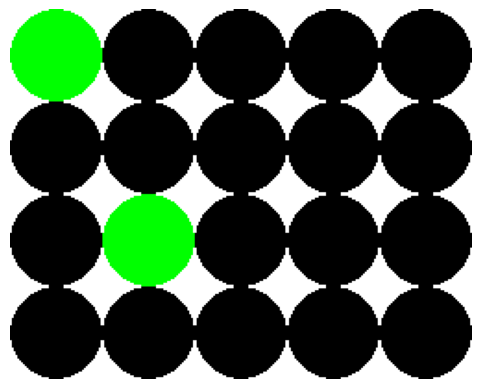

Após trocar(1, 3, 'vermelho'):


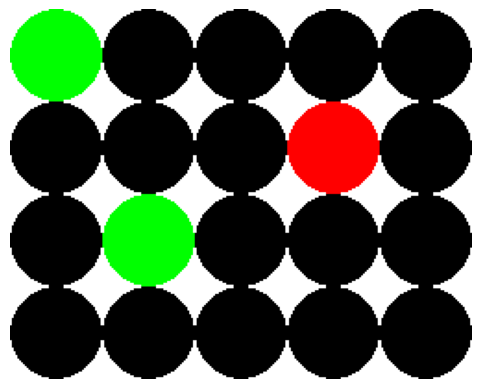

Após trocar(3, 4, 'amarelo'):


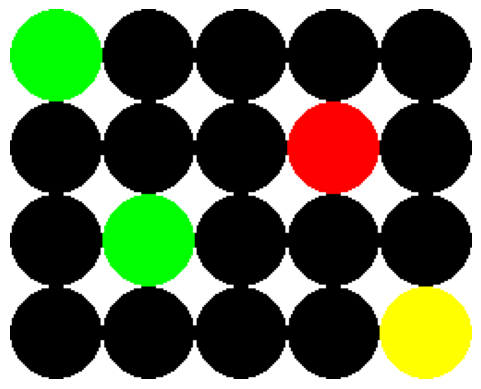

In [2]:
import pygame
import sys
import matplotlib.pyplot as plt
import os

# Inicializando o pygame
pygame.init()

# Função 1: Criar a matriz com dimensões fornecidas
def criar_matriz(altura, largura):
    """
    Cria uma matriz com dimensões especificadas (máximo 10x10).
    Retorna uma matriz preenchida com 'preto' como padrão.
    """
    if altura > 10 or largura > 10 or altura < 1 or largura < 1:
        print("Erro: Dimensões devem estar entre 1 e 10!")
        return None
    matriz = [['preto' for _ in range(largura)] for _ in range(altura)]
    matriz[0][0] = 'verde'  # Canto superior esquerdo (0,0) começa verde
    return matriz

# Função 2: Exibir a matriz usando pygame e salvar a imagem em cada passo
def exibir_matriz_pygame(matriz, step=0):
    """
    Exibe a matriz como uma grade de círculos coloridos usando pygame.
    Cada célula é representada por um círculo.
    Salva a imagem a cada etapa.
    """
    if matriz is None:
        return

    altura = len(matriz)
    largura = len(matriz[0])
    tamanho_celula = 50  # Tamanho de cada célula em pixels
    img_largura = largura * tamanho_celula
    img_altura = altura * tamanho_celula

    # Criando uma superfície para desenhar a imagem
    screen = pygame.Surface((img_largura, img_altura))

    # Dicionário de cores
    cores = {
        'preto': (0, 0, 0),
        'verde': (0, 255, 0),
        'vermelho': (255, 0, 0),
        'azul': (0, 0, 255),
        'amarelo': (255, 255, 0)
    }

    # Preenchendo a tela com fundo branco
    screen.fill((255, 255, 255))

    # Desenhando a matriz na tela
    for i in range(altura):
        for j in range(largura):
            cor = cores.get(matriz[i][j], (0, 0, 0))  # Padrão preto se cor não existir
            pygame.draw.circle(screen, cor, (j * tamanho_celula + tamanho_celula // 2, i * tamanho_celula + tamanho_celula // 2), tamanho_celula // 2)

    # Salvando a imagem em um arquivo temporário
    image_path = f"/content/matriz_step_{step}.png"
    pygame.image.save(screen, image_path)

    # Converte a imagem salva para exibição no Colab
    img = plt.imread(image_path)

    # Exibe a imagem usando Matplotlib
    plt.imshow(img)
    plt.axis('off')  # Desativa os eixos
    plt.show()

# Função 3: Trocar um ponto na matriz e exibir a imagem após a mudança
def trocar(matriz, x, y, cor, step):
    """
    Insere uma cor em uma posição específica da matriz e exibe a matriz atualizada.
    x é a linha (altura), y é a coluna (largura).
    """
    if matriz is None:
        print("Erro: Matriz não criada!")
        return

    altura = len(matriz)
    largura = len(matriz[0])

    if x < 0 or x >= altura or y < 0 or y >= largura:
        print(f"Erro: Coordenadas ({x}, {y}) fora dos limites da matriz {altura}x{largura}!")
        return

    matriz[x][y] = cor
    exibir_matriz_pygame(matriz, step)

# Exemplo de execução
def main():
    # Criar uma matriz 4x5
    matriz = criar_matriz(4, 5)
    print("Matriz inicial:")
    exibir_matriz_pygame(matriz, 0)

    # Testar a função trocar
    print("Após trocar(2, 1, 'verde'):")
    trocar(matriz, 2, 1, 'verde', 1)

    # Mais exemplos
    print("Após trocar(1, 3, 'vermelho'):")
    trocar(matriz, 1, 3, 'vermelho', 2)

    print("Após trocar(3, 4, 'amarelo'):")
    trocar(matriz, 3, 4, 'amarelo', 3)

# Executar o programa
if __name__ == "__main__":
    main()

# Finaliza o pygame
pygame.quit()